In [1]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **S8_Mini_Project(Clustering)**

### Project_Title : Clustering – Mall Customers

In [2]:
# For Numerical and Statistical Computations

import numpy as np
import pandas as pd

# For Visulizations

import matplotlib.pyplot as plt
import seaborn as sb

# For Scaling, Encoder and Splitting and score from Sci-Kit

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score

# Warnings

import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [3]:
# Importing Data

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASETS/DS3_C6_S3_MallCustomers_Data_Project.csv')

# Copy data

df_copy = df.copy()

**Data Understanding**

In [4]:
# Preview of the data

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Shape of the data

print(f"Structure \n\nRows : {df.shape[0]} and Columns : {df.shape[1]}")

Structure 

Rows : 200 and Columns : 5


In [6]:
# Datatypes info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Descriptive analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
# Columns in df

col = list(df.columns)
col

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

**Observations**

1.   There are totally **200 Rows** and **5 Columns** in the data given, which 
contains small amount of observations.

1.   There is one catgeorical column - Gender and some column names are not     proper.

1.   Seems to be all rows are filled and no missing values.

1.   From **Descriptive**

    1.  It is clear that the STD of all numerical columns fall under the region of mean value.
    2.  T he impact of outliers in the data seems to be not much.



**Data PreProcessing**

In [9]:
# Changing column names and case

df.rename(columns = {'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_score'}, inplace = True)

df.columns = df.columns.str.lower()

In [10]:
# Checking for null values

df.isnull().sum()

customerid        0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [11]:
# Dropping CustomerID because it contains 200 unique values

print("No of unique values in customerid = ", df['customerid'].nunique())

df.drop('customerid', axis = 1, inplace = True)

No of unique values in customerid =  200


In [12]:
# Encoding the general column

df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [13]:
# Preview of the data after processed

df.head()

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Observations

* Now the data is preprocessed.

* The data is fully converted into numeric format.

* All the columns are changes to uniform case.

# **EDA**

**How Average_income and spending score plays in gender category**

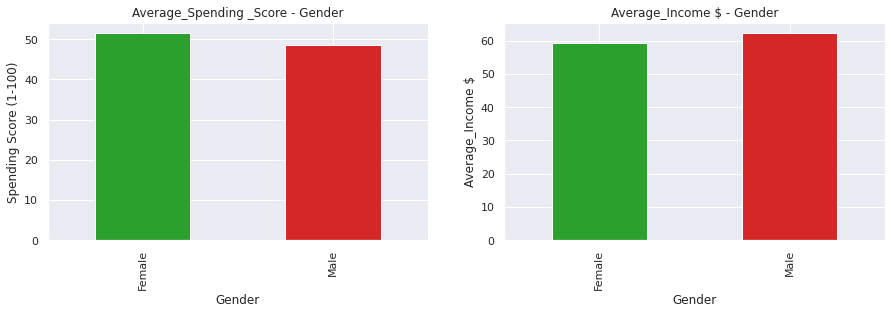

In [14]:
plt.figure(figsize = (15,4))
sb.set(style='darkgrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.subplot(121)
plt.title('Average_Spending _Score - Gender')
df_copy.groupby('Gender')['Spending Score (1-100)'].mean().plot(kind = 'bar', ylabel = 'Spending Score (1-100)' , xlabel = 'Gender', color = ['#2ca02c', '#d62728'])

plt.subplot(122)
plt.title('Average_Income $ - Gender')
df_copy.groupby('Gender')['Annual Income (k$)'].mean().plot(kind = 'bar', ylabel = 'Average_Income $' , xlabel = 'Gender', color = ['#2ca02c', '#d62728'])

plt.show()

# **Observations**

* The average spending score and annual income of **women** is approximately   equal > **50$**.

* The average annual income of **men** is > **60$** whereas his spending score is < than womens average spending score.
* Womens spending is high but not mens.
* Mens annual income is high but not womens.
* both spending scores are < than their income.

**How Age is impacting in Spending Score and annual income**

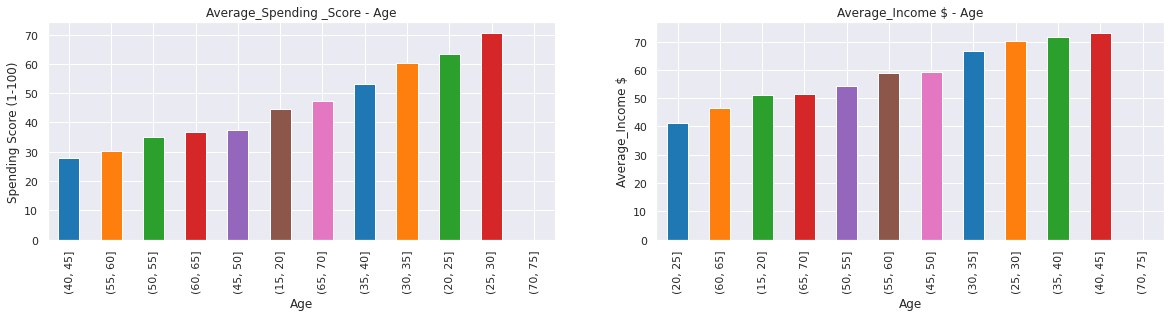

In [15]:
# Setting age bins and colors and figure size
plt.figure(figsize = (20,4))
sb.set(style='darkgrid')
age = (pd.cut(df_copy['Age'], bins =[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]))

plt.subplot(121)
plt.title('Average_Spending _Score - Age')
df_copy.groupby(age)['Spending Score (1-100)'].mean().sort_values().plot(kind = 'bar', ylabel = 'Spending Score (1-100)' , xlabel = 'Age', color = colors)

plt.subplot(122)
plt.title('Average_Income $ - Age')
df_copy.groupby(age)['Annual Income (k$)'].mean().sort_values().plot(kind = 'bar', ylabel = 'Average_Income $' , xlabel = 'Age', color = colors)

plt.show()

**Observations**

> **Spending Score**

* The age groups between 20 - 35 are more like to spend more, having **spending score > 60$**.

* The age groups between 40 - 60 are more like to spend less, having **spending score < 35$**.

> **Annual Income**

* The age groups between 25 - 45 are earning an **average annual income of > 65$**.

* The age groups between 20 - 25 and 60 - 65 are earning an **average annual income of < 40$** , also one group are seems to be new and the other group are seems to be retire.



**Distributions of Annual income and spending score**

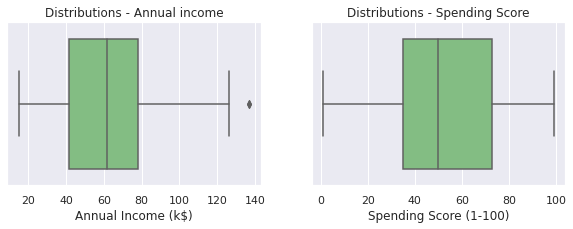

In [16]:
plt.figure(figsize = (10,3))
sb.set(style='darkgrid')

plt.subplot(121)
plt.title("Distributions - Annual income")
sb.boxplot(data = df_copy, x = 'Annual Income (k$)', palette = 'YlGn_r')

plt.subplot(122)
plt.title("Distributions - Spending Score")
sb.boxplot(data = df_copy, x = 'Spending Score (1-100)', palette = 'YlGn_r')

plt.show()

# **Observations**
> **Annual Income**
* In Annual income there is a outlier falls beyond upper fence.
* The data is slight skewed towards positive.
* The average of annual income is ~~ to  **60$**.
* The data can be scaled.

> **Spending Score**
* In Spending score all the values are inside the lower and upper fence.
* The distributio looks quite perfect.
* The average of Spending Score is ~~ to **50$**.



**Scaling**

In [17]:
# Scaling using  StandardScaler

df_scaled = StandardScaler().fit_transform(df)

# Preview od data after scaled

print(df_scaled[:5])

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]]


**Model Building**

In [18]:
# For scoring silhouette scores

s = {}

# **KMEANS_Clustering**

In [19]:
# Importing KMeans silhouette_score using sklearn 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Distorsions - within cluster sum of squares')

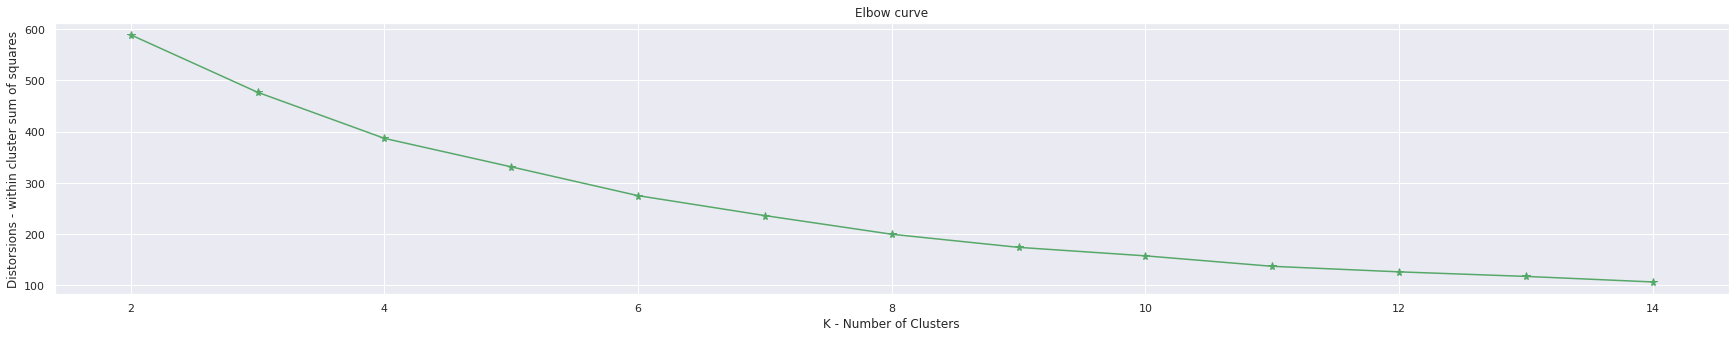

In [20]:
# Finding K using elbow curve

error = []
for k in range(2, 15):
    model = KMeans(n_clusters = k, random_state = 15)
    model.fit(df_scaled)
    error.append(model.inertia_)

# Plotting Elbow Curve
fig = plt.figure(figsize=(30, 5))
sb.set(style='darkgrid')
plt.plot(range(2, 15), error, marker = '*', markersize = 8, color = 'g')
plt.title('Elbow curve')
plt.xlabel('K - Number of Clusters')
plt.ylabel('Distorsions - within cluster sum of squares')

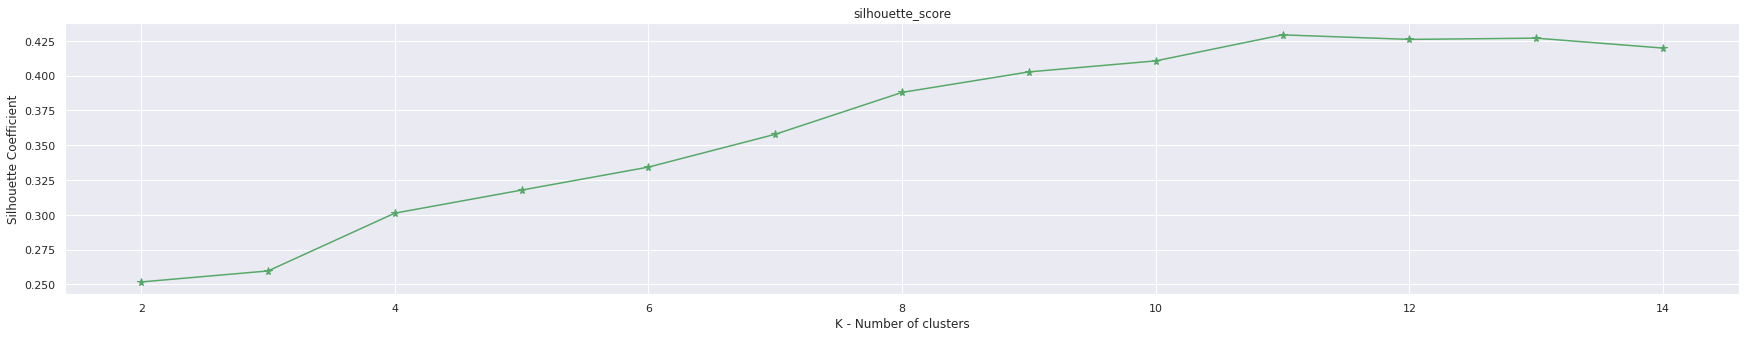

In [21]:
# Finding K using silhouette_score

k_range = range(2, 15)
scores = []
for k in k_range:
    model = KMeans(n_clusters = k, random_state = 15)
    model.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, model.labels_))

# plot the silhouette_score

fig = plt.figure(figsize=(30, 5))
sb.set(style='darkgrid')
plt.plot(k_range, scores, marker = '*', markersize = 8, color = 'g')
plt.title('silhouette_score')
plt.xlabel('K - Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

* Using silhouette_score coefficient k = 11 is the optimum value

In [22]:
# Building the model using k = 11

model_km = KMeans(n_clusters = 11)

# Training hte model k = 2

model_km.fit(df_scaled)

# Finding silhouette_score for kmeans and Adding cluster to the df

print(silhouette_score(df_scaled, model_km.labels_))

df['KM'] = model_km.labels_

0.42998269513575094


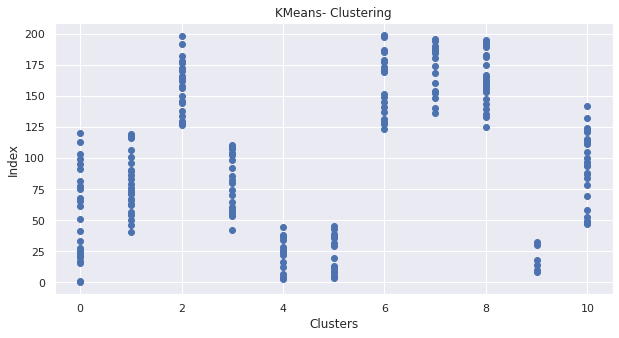

In [23]:
# Plotting KMeans clustering
plt.figure(figsize = (10, 5))
plt.title('KMeans- Clustering')
plt.scatter(df['KM'], y = range(len(df['KM'])))
plt.xlabel('Clusters')
plt.ylabel('Index')
plt.show()

# **Observations**

* The Silhouette_Score for KMeans is 41%.
* From the chart we can see the clustering of Kmeans.
* The last cluster 11 was able to cluster only less datapoints.

In [24]:
# Storing silhouette score for KMeans

s['Kmeans'] = silhouette_score(df_scaled, model_km.labels_)

# **Hierarchical_Clustering**

In [25]:
# For Hirearchical clustering from sklearn

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

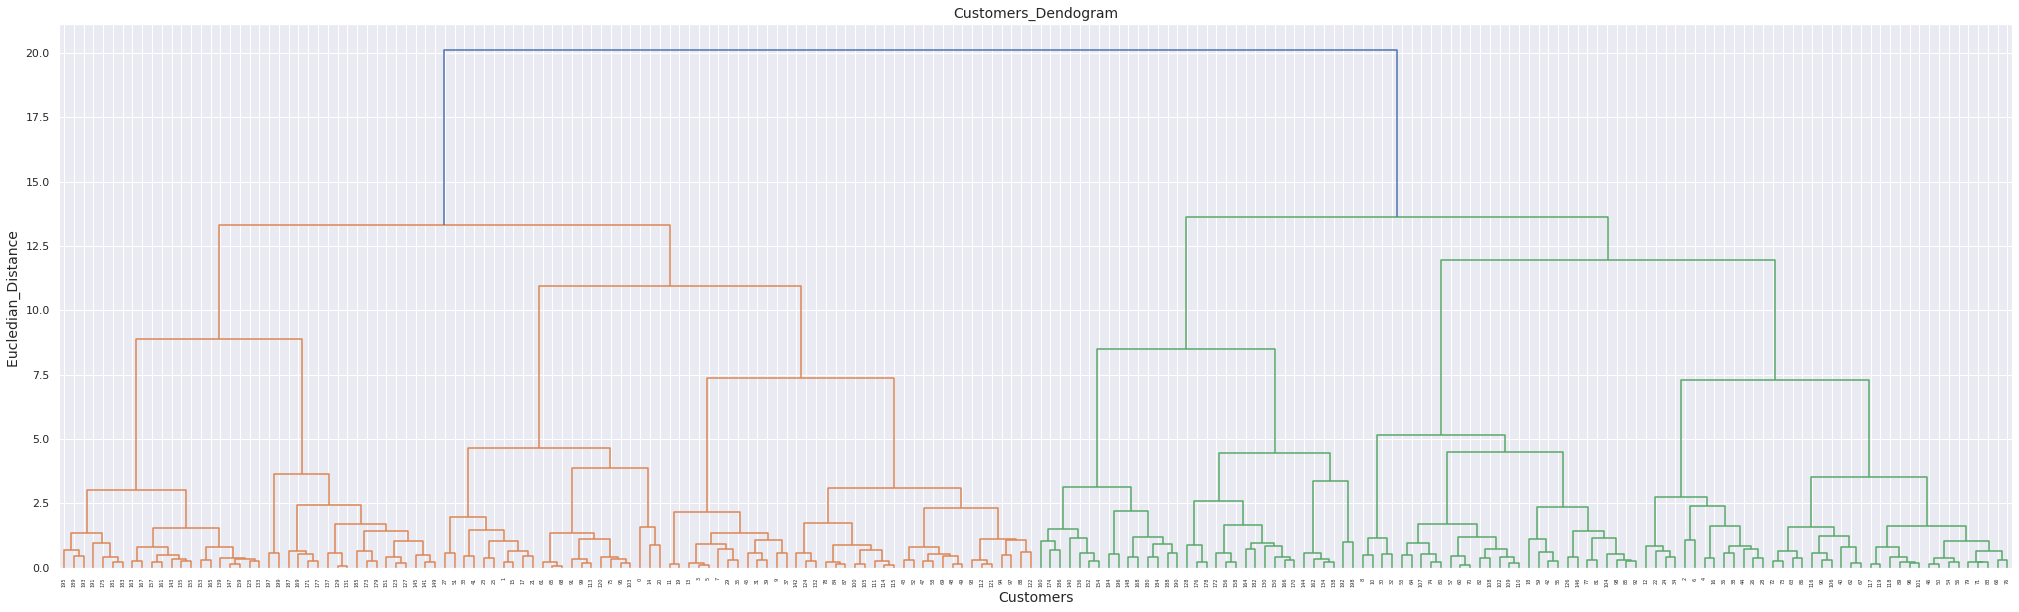

In [26]:
# Plotting Dendogram

plt.figure(figsize = (35,10))
plt.title('Customers_Dendogram', fontsize = 14)
sch.dendrogram(sch.linkage(df_scaled, method = 'ward'), labels = df.index)
plt.ylabel('Eucledian_Distance ', fontsize = 14)
plt.xlabel('Customers', fontsize = 14)
plt.grid(True)
plt.show()

In [27]:
# Calculating silhouette_score for different clusters

# For cluster = 4

c4 = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 4 = ", silhouette_score(df_scaled, c4))

# For cluster = 5

c5 = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 5 = ", silhouette_score(df_scaled, c5))


# For cluster = 6

c6 = AgglomerativeClustering(n_clusters = 6, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 6 = ", silhouette_score(df_scaled, c6))

# For cluster = 7

c7 = AgglomerativeClustering(n_clusters = 7, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 7 = ", silhouette_score(df_scaled, c7))

# For cluster = 8

c8 = AgglomerativeClustering(n_clusters = 8, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 8 = ", silhouette_score(df_scaled, c8))

# For cluster = 9

c9 = AgglomerativeClustering(n_clusters = 9, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 9 = ", silhouette_score(df_scaled, c9))

# For cluster = 10

c10 = AgglomerativeClustering(n_clusters = 10, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 10 = ", silhouette_score(df_scaled, c10))

# For cluster = 11

c11 = AgglomerativeClustering(n_clusters = 11, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 11 = ", silhouette_score(df_scaled, c11))

# For cluster = 12

c12 = AgglomerativeClustering(n_clusters = 12, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 12 = ", silhouette_score(df_scaled, c12))

# For cluster = 13

c13 = AgglomerativeClustering(n_clusters = 13, metric = 'euclidean', linkage = 'ward').fit_predict(df_scaled)
print(" K = 13 = ", silhouette_score(df_scaled, c13))

 K = 4 =  0.2632260518820244
 K = 5 =  0.28699413201651747
 K = 6 =  0.3102445968526053
 K = 7 =  0.34555782664693324
 K = 8 =  0.3788796050129373
 K = 9 =  0.39225805358687793
 K = 10 =  0.4176254448686808
 K = 11 =  0.42517748630372254
 K = 12 =  0.42440324303677535
 K = 13 =  0.4198062925672963


* From the dendogram and using silhouette score  k = 11 is the optimum k value.

In [28]:
# Building model with AgglomerativeClustering with eucledian distance

model = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

model = model.fit_predict(df_scaled)

In [29]:
# Building the model using k = 11

model_ac = AgglomerativeClustering(n_clusters = 11, metric = 'euclidean', linkage = 'ward')

# Training hte model k = 11

model_ac.fit_predict(df_scaled)

# Finding silhouette_score for kmeans and Adding cluster to the df

print(silhouette_score(df_scaled, model_ac.labels_))

df['AC'] = model_ac.labels_

0.42517748630372254


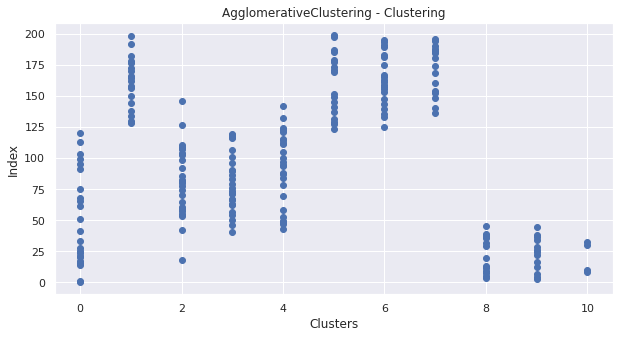

In [30]:
# Plotting KMeans clustering
plt.figure(figsize = (10, 5))
plt.title('AgglomerativeClustering - Clustering')
plt.scatter(df['AC'], y = range(len(df['AC'])))
plt.xlabel('Clusters')
plt.ylabel('Index')
plt.show()

# **Observations**

* The Silhouette_Score for AgglomerativeClustering is 42%.
* From the chart we can see the clustering of AgglomerativeClustering.
* The last cluster 11 was able to cluster only less datapoints as in Kmeans.
* The Silhouette_Score of both Kmeans and Silhouette_Score are equal.

In [31]:
# Storing silhouette score for AgglomerativeClustering

s['AgglomerativeClustering'] = silhouette_score(df_scaled, model_ac.labels_)

**DBSCAN_Clustering**

In [32]:
# Importing NearestNeighbor from sklearn to find the best HyperParameters

from sklearn.neighbors import NearestNeighbors
# Importing DBSCAN model from cluster from sklearn for Density clustering

from sklearn.cluster import DBSCAN

In [33]:
# Building and training the model

model = NearestNeighbors(n_neighbors = 4).fit(df_scaled)

distance, indices = model.kneighbors(df_scaled)

# Sorting the distance 

distance = np.sort(distance, axis = 0)

distance = distance[:, 1]

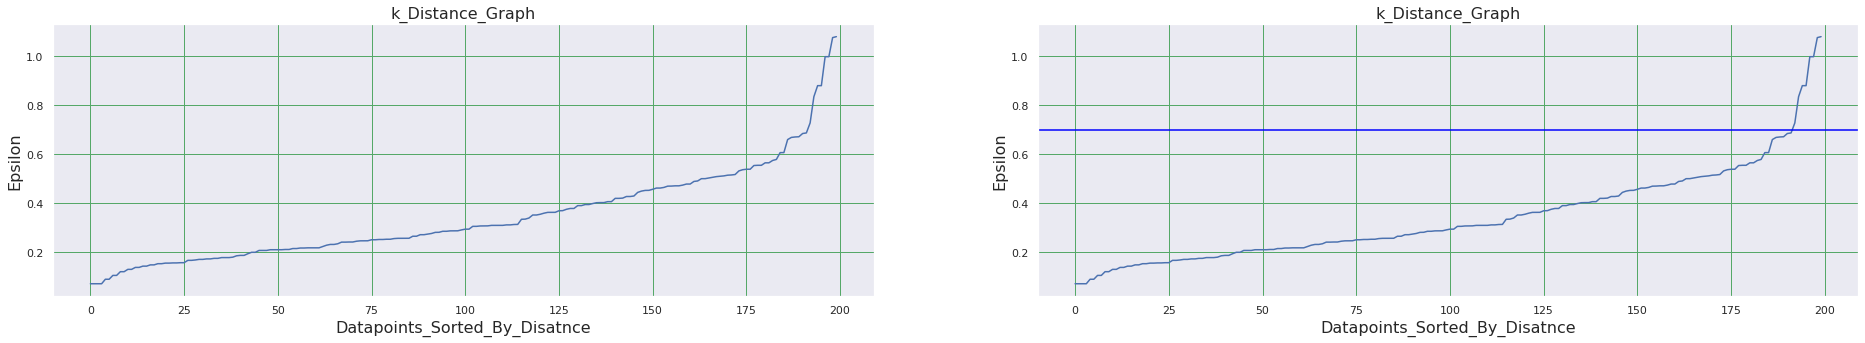

In [34]:
# Plotting the distances and distance with axhline with subplots

plt.figure(figsize = (50,5))

plt.subplot(1,3,1)
plt.title('k_Distance_Graph', fontsize = 16)
plt.grid(True, color = 'g')
plt.plot(distance)
plt.xlabel('Datapoints_Sorted_By_Disatnce', fontsize = 16)
plt.ylabel('Epsilon', fontsize = 16)

plt.subplot(1,3,2)
plt.title('k_Distance_Graph', fontsize = 16)
plt.grid(True, color = 'g')
plt.plot(distance)
plt.axhline(y = 0.7, color = 'blue', linestyle = 'solid')
plt.xlabel('Datapoints_Sorted_By_Disatnce', fontsize = 16)
plt.ylabel('Epsilon', fontsize = 16)
plt.show()

In [35]:
eps = [0.5, 0.6, 0.7, 0.8, 0.9]
for i in eps:
    print()
    print(f'Epsilon = {i}')
    print()
    for min_samples in range(2,10):
        clusterer = DBSCAN(eps = i, min_samples = min_samples)
        clusterer_labels = clusterer.fit_predict(df_scaled)
        X = clusterer_labels + 2
        y = np.bincount(X)
        ii = np.nonzero(y)[0]
        res = list(zip(ii, y[ii])) 
        print(f' Epsilon = {i} | Min_Samples = {min_samples} | Obtained_clustering = {res}')


Epsilon = 0.5

 Epsilon = 0.5 | Min_Samples = 2 | Obtained_clustering = [(1, 37), (2, 6), (3, 9), (4, 5), (5, 2), (6, 2), (7, 3), (8, 2), (9, 20), (10, 23), (11, 19), (12, 3), (13, 5), (14, 7), (15, 2), (16, 8), (17, 19), (18, 2), (19, 3), (20, 4), (21, 3), (22, 5), (23, 6), (24, 3), (25, 2)]
 Epsilon = 0.5 | Min_Samples = 3 | Obtained_clustering = [(1, 49), (2, 9), (3, 6), (4, 5), (5, 3), (6, 19), (7, 23), (8, 20), (9, 3), (10, 5), (11, 7), (12, 8), (13, 19), (14, 3), (15, 4), (16, 6), (17, 3), (18, 5), (19, 3)]
 Epsilon = 0.5 | Min_Samples = 4 | Obtained_clustering = [(1, 76), (2, 9), (3, 5), (4, 4), (5, 19), (6, 23), (7, 20), (8, 7), (9, 7), (10, 18), (11, 4), (12, 4), (13, 4)]
 Epsilon = 0.5 | Min_Samples = 5 | Obtained_clustering = [(1, 105), (2, 5), (3, 5), (4, 18), (5, 18), (6, 15), (7, 7), (8, 4), (9, 17), (10, 6)]
 Epsilon = 0.5 | Min_Samples = 6 | Obtained_clustering = [(1, 135), (2, 18), (3, 18), (4, 6), (5, 6), (6, 17)]
 Epsilon = 0.5 | Min_Samples = 7 | Obtained_clusterin

* from the above results 
    * Epsilon = 0.7 | Min_Samples = 8

In [36]:
# Building hte model with hyper parameters

# Building and training the model

model_db = DBSCAN(eps = 0.7, min_samples = 8)

model_db.fit(df_scaled)

# Finding silhouette_score for kmeans and Adding cluster to the df

print(silhouette_score(df_scaled, model_db.labels_))

df['DB'] = model_db.labels_

0.12362026848194814


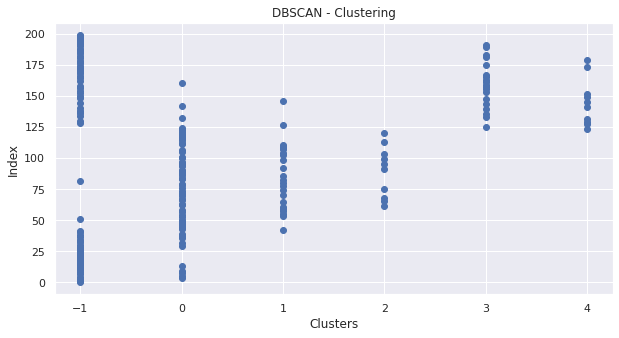

In [37]:
# Plotting KMeans clustering
plt.figure(figsize = (10, 5))
plt.title('DBSCAN - Clustering')
plt.scatter(df['DB'], y = range(len(df['DB'])))
plt.xlabel('Clusters')
plt.ylabel('Index')
plt.show()

# **Observations**

* The Silhouette_Score for DBSCAN is only 12%. 
* Which is less than Kmeans and Agglomerative.
* From the chart we can see the clustering of DBSCAN.
* The 1st 2 clusters was able to cluster many datapoints.
* The 2,3 and 4th cluster are no capable of clustering many data points because of low observations

In [38]:
# Storing silhouette score for DBSCAN

s['DBSCAN'] = silhouette_score(df_scaled, model_db.labels_)

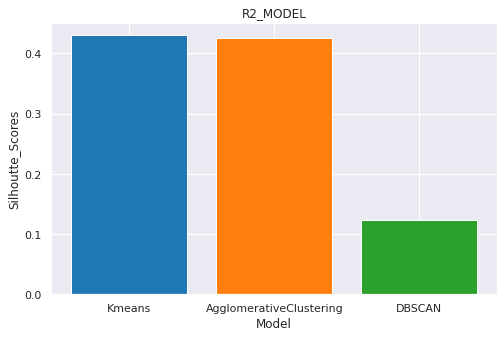

In [39]:
# Plotting Silhoutte_Scores of each model

plt.figure(figsize = (8,5))
names = list(s.keys())
values = list(s.values())
plt.title('R2_MODEL')
plt.bar(x = names, height = values, tick_label = names, color = colors)
plt.xlabel('Model')
plt.ylabel('Silhoutte_Scores')
plt.show()

# **Observations**

* From this chart we can able to see that the Kmeans and AgglomerativeClustering
performs well in clustering.
* The DBSCAN was not able to perform upto Kmeans and AgglomerativeClustering.
* The Kmeans and AgglomerativeClusterin x3 perfroms better than DBSCAN.

# **Conclusion**
* Either Kmeans or AgglomerativeClustering xcan be used to buil and predict for better results and performance.